In [930]:
import tweepy
import pandas as pd 
import numpy as np
import requests
import json 
import re

## Gather

#### Gathering three data sources: 
- CSV file
- Data scraping from a web-page
- data from an API

In [931]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None


In [932]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)


In [933]:
with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [934]:
df_predict = pd.read_csv('image_predictions.tsv', sep='\t', header=0)
df_predict.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [935]:
df_tweet_api = pd.read_json('tweet-json.txt', lines=True)
df_tweet_api = df_tweet_api[[ 'id', 'retweet_count', 'favorite_count']]
df_tweet_api.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [936]:
archive_predict_api = df_archive.merge(df_predict, on='tweet_id', how='left') \
                        .merge(df_tweet_api, left_on='tweet_id', right_on='id', how='left')



In [937]:
archive_predict_api.to_csv('we_rate_dogs.csv', index=False)

# Assess
### Quality Issues
- Remove original ratings without an image 
- timestamp: remove '+0000' and change data type 
- img_num: change data type from float to int 
- p1,p2,p3: change all names to Lowercase + remove under scores 
- retweet count: change datatype from float to int 
- favorite_count: change datatype from float to int 
- rating_denominator: correct all values to 10
- rating_numerator: correct all values by rating_denominator column
- name: change 'None' to null, change 'a' to null 
- doggo,floofer,pupper,puppo change 'None' to null 





### Tidiness Issues
- Combine 3 data sources to 1 table 
- Combine the columns: doggo,floofer,pupper,puppo under stage column



In [938]:
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', 800)


## Clean

In [939]:
dogs_rate_clean = archive_predict_api.copy()


### Code

#### Remove original ratings without an image 

In [940]:
dogs_rate_clean[dogs_rate_clean.jpg_url.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.862670e+17,4.0,117.0
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.860542e+17,108.0,0.0
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/885517367337512960,14,10,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.855190e+17,3899.0,20788.0
42,884247878851493888,NaN,NaN,2017-07-10 03:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LITTLE BARKOUR HE'S SUPER SORRY 13/10 WOULD FORGIVE IMMEDIATE https://t.co/uF3pQ8Wubj,NaN,NaN,NaN,https://twitter.com/kaijohnson_19/status/883965650754039809,13,10,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.842479e+17,21298.0,74423.0
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.816333e+17,7.0,129.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.715503e+17,229.0,967.0
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After countless hours of research and hundreds of formula alterations we have concluded that Dug should be bumped to an 11/10,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.696849e+17,99.0,551.0
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.689679e+17,25.0,161.0
2212,668587383441514497,NaN,NaN,2015-11-23 00:30:28 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Never forget this vine. You will not stop watching for at least 15 minutes. This is the second coveted.. 13/10 https://t.co/roqIxCvEB3,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,13,10,the,None,None,None,None,NaN,NaN,NaN,NaN,NaN,Na

#### Test

In [941]:
dogs_rate_clean = dogs_rate_clean.dropna(subset=['jpg_url'])
dogs_rate_clean.jpg_url.isnull().sum()

0

#### Remove '+0000' from 'timestamp' column and change data type

In [942]:
dogs_rate_clean['timestamp'] = dogs_rate_clean['timestamp'].str[:-5] 


In [943]:
dogs_rate_clean['timestamp'] = pd.to_datetime(dogs_rate_clean['timestamp'])

#### Test

In [944]:
dogs_rate_clean['timestamp']

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
               ...        
2351   2015-11-16 00:24:50
2352   2015-11-16 00:04:52
2353   2015-11-15 23:21:54
2354   2015-11-15 23:05:30
2355   2015-11-15 22:32:08
Name: timestamp, Length: 2075, dtype: datetime64[ns]

#### Remove nulls and change data type from float to int in columns: img_num, retweet_count, favorite_count

In [945]:
dogs_rate_clean.favorite_count.isnull().sum()

2

In [946]:
dogs_rate_clean.img_num.isnull().sum()

0

In [947]:
dogs_rate_clean.retweet_count.isnull().sum()

2

In [948]:
dogs_rate_clean = dogs_rate_clean.dropna(subset=['retweet_count','favorite_count'])
dogs_rate_clean[['img_num','retweet_count','favorite_count']] = dogs_rate_clean[['img_num','retweet_count','favorite_count']].astype(float).astype('int64')


#### Test

In [949]:
dogs_rate_clean.retweet_count.isnull().sum()


0

In [950]:
dogs_rate_clean.favorite_count.isnull().sum()

0

In [951]:
dogs_rate_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2355
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2073 non-null   int64         
 1   in_reply_to_status_id       23 non-null     float64       
 2   in_reply_to_user_id         23 non-null     float64       
 3   timestamp                   2073 non-null   datetime64[ns]
 4   source                      2073 non-null   object        
 5   text                        2073 non-null   object        
 6   retweeted_status_id         79 non-null     float64       
 7   retweeted_status_user_id    79 non-null     float64       
 8   retweeted_status_timestamp  79 non-null     object        
 9   expanded_urls               2073 non-null   object        
 10  rating_numerator            2073 non-null   int64         
 11  rating_denominator          2073 non-null   int64       

#### Change all breed names to Lowercase + replace under scores with space

In [952]:
def clean_breed(x):
    return x.str.replace("_"," ").str.lower()

dogs_rate_clean[["p1", "p2", "p3"]] = dogs_rate_clean[["p1", "p2", "p3"]].apply(clean_breed)

#### Test

In [953]:
dogs_rate_clean[["p1", "p2", "p3"]].sample(5)

,p1,p2,p3
1438,chihuahua,pembroke,basenji
359,golden retriever,labrador retriever,tennis ball
1952,samoyed,arctic fox,chow
1977,lakeland terrier,west highland white terrier,wire-haired fox terrier
1871,golden retriever,labrador retriever,flat-coated retriever


#### 'name' column: set 'None' to null, format to title(), set 'A' to null

In [954]:
def clean_name(x):
    return x.replace("None",np.nan).str.title()

dogs_rate_clean[['name']] = dogs_rate_clean[['name']].apply(clean_name)

In [955]:
def fix_name(x):
    return x.replace("A",np.nan)

dogs_rate_clean[['name']] = dogs_rate_clean[['name']].apply(fix_name)

#### Test

In [956]:
dogs_rate_clean['name'].value_counts()

Charlie       11
Oliver        10
Cooper        10
Lucy          10
Penny         10
              ..
Emma           1
Spencer        1
Lilli          1
Boston         1
Christoper     1
Name: name, Length: 934, dtype: int64

#### doggo,floofer,pupper,puppo columns: change 'None' to Blank

In [957]:
def clean_breed(x):
    return x.replace("None","")

dogs_rate_clean[['doggo','floofer','pupper','puppo']] = dogs_rate_clean[['doggo','floofer','pupper','puppo']].apply(clean_breed)

#### Test

In [958]:
dogs_rate_clean.floofer.value_counts()

           2065
floofer       8
Name: floofer, dtype: int64

In [959]:
dogs_rate_clean.doggo.value_counts()

         1993
doggo      80
Name: doggo, dtype: int64

In [960]:
dogs_rate_clean.pupper.value_counts()

          1852
pupper     221
Name: pupper, dtype: int64

In [961]:
dogs_rate_clean.puppo.value_counts()

         2049
puppo      24
Name: puppo, dtype: int64

#### Correct all 'rating_denominator' values to 10 and correct all 'rating_numerator' values by 'rating_denominator' column

In [962]:
for i,r in dogs_rate_clean.iterrows():
    if dogs_rate_clean['rating_denominator'].any!= 10:
        x= dogs_rate_clean['rating_denominator']/10
        dogs_rate_clean['rating_numerator']= dogs_rate_clean['rating_numerator']/x
        dogs_rate_clean['rating_denominator'] = 10
        

#### Test

In [963]:
dogs_rate_clean['rating_denominator'].value_counts()

10    2073
Name: rating_denominator, dtype: int64

In [964]:
dogs_rate_clean['rating_numerator'].value_counts()

12.000000      477
10.000000      431
11.000000      419
13.000000      283
9.000000       151
8.000000        95
7.000000        51
14.000000       40
5.000000        35
6.000000        32
3.000000        19
4.000000        15
2.000000        10
1.000000         4
0.000000         2
27.000000        1
75.000000        1
34.285714        1
15.000000        1
1776.000000      1
8.181818         1
6.363636         1
26.000000        1
420.000000       1
Name: rating_numerator, dtype: int64

#### Convert 'rating_numerator' dtype to int

In [965]:
dogs_rate_clean[['rating_numerator']] = dogs_rate_clean[['rating_numerator']].astype(float).astype('int64')

In [966]:
dogs_rate_clean['rating_numerator'].value_counts()

12      477
10      431
11      419
13      283
9       151
8        96
7        51
14       40
5        35
6        33
3        19
4        15
2        10
1         4
0         2
26        1
1776      1
27        1
75        1
34        1
15        1
420       1
Name: rating_numerator, dtype: int64

#### Combine the columns: doggo,floofer,pupper,puppo under stage column

In [967]:
dogs_rate_clean['stage'] = dogs_rate_clean['doggo'] + dogs_rate_clean['floofer'] + dogs_rate_clean['pupper'] + dogs_rate_clean['puppo']

#### Test

In [968]:
dogs_rate_clean['stage'].value_counts()

                1753
pupper           210
doggo             67
puppo             23
doggopupper       11
floofer            7
doggopuppo         1
doggofloofer       1
Name: stage, dtype: int64

#### doggo, floofer, pupper, puppo, stage columns: change Blank to null

In [969]:
def clean_blank(x):
    return x.replace("",np.nan)

dogs_rate_clean[['doggo','floofer','pupper','puppo','stage']] = dogs_rate_clean[['doggo','floofer','pupper','puppo','stage']].apply(clean_blank)

In [970]:
dogs_rate_clean['stage'].value_counts()

pupper          210
doggo            67
puppo            23
doggopupper      11
floofer           7
doggopuppo        1
doggofloofer      1
Name: stage, dtype: int64

In [971]:
dogs_rate_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2355
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2073 non-null   int64         
 1   in_reply_to_status_id       23 non-null     float64       
 2   in_reply_to_user_id         23 non-null     float64       
 3   timestamp                   2073 non-null   datetime64[ns]
 4   source                      2073 non-null   object        
 5   text                        2073 non-null   object        
 6   retweeted_status_id         79 non-null     float64       
 7   retweeted_status_user_id    79 non-null     float64       
 8   retweeted_status_timestamp  79 non-null     object        
 9   expanded_urls               2073 non-null   object        
 10  rating_numerator            2073 non-null   int64         
 11  rating_denominator          2073 non-null   int64       

#### Drop the mixed stage dogs (small percentage of the data)

In [972]:
invalid_stage = ['doggopupper','doggopuppo','doggofloofer']
dogs_rate_clean = dogs_rate_clean[-dogs_rate_clean['stage'].isin(invalid_stage)]

In [973]:
dogs_rate_clean['stage'].value_counts()

pupper     210
doggo       67
puppo       23
floofer      7
Name: stage, dtype: int64

#### Drop the irrelevant columns: doggo, pupper, puppo, floofer 

In [974]:
dogs_rate_clean = dogs_rate_clean.drop(['doggo','floofer','pupper','puppo'], axis=1)

In [975]:
dogs_rate_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'id',
       'retweet_count', 'favorite_count', 'stage'],
      dtype='object')

## Test (Summary)

In [976]:
dogs_rate_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8.924206e+17,8853,39467,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,8.921774e+17,6514,33819,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,8.918152e+17,4328,25461,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False,8.916896e+17,8964,42908,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True,8.913276e+17,9774,41048,NaN


In [977]:
dogs_rate_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'id',
       'retweet_count', 'favorite_count', 'stage'],
      dtype='object')

In [978]:
dogs_rate_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2060 entries, 0 to 2355
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2060 non-null   int64         
 1   in_reply_to_status_id       22 non-null     float64       
 2   in_reply_to_user_id         22 non-null     float64       
 3   timestamp                   2060 non-null   datetime64[ns]
 4   source                      2060 non-null   object        
 5   text                        2060 non-null   object        
 6   retweeted_status_id         77 non-null     float64       
 7   retweeted_status_user_id    77 non-null     float64       
 8   retweeted_status_timestamp  77 non-null     object        
 9   expanded_urls               2060 non-null   object        
 10  rating_numerator            2060 non-null   int64         
 11  rating_denominator          2060 non-null   int64       

In [979]:
dogs_rate_clean.shape

(2060, 28)

## Analyzing and Visualizing Data

In [980]:
import matplotlib.pyplot as plt

#### The two quantitative variables have a positive linear relationship

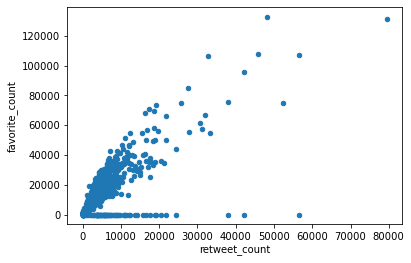

In [981]:
dogs_rate_clean.plot(x="retweet_count", y = "favorite_count", kind="scatter")
plt.show()


#### Top 10 breeds of dog, according to the 1st prediction of the breed of dog based on its image

In [982]:
top_breeds = dogs_rate_clean.p1.value_counts()
top_breeds = top_breeds.nlargest(10)
print(top_breeds)

golden retriever      144
labrador retriever     99
pembroke               88
chihuahua              83
pug                    57
chow                   44
samoyed                43
toy poodle             39
pomeranian             38
cocker spaniel         30
Name: p1, dtype: int64


#### Top 10 common dog names

In [983]:
top_names = dogs_rate_clean.name.value_counts()
top_names = top_names.nlargest(10)
print(top_names)

Charlie    11
Tucker     10
Cooper     10
Penny      10
Oliver     10
Lucy       10
Bo          8
Sadie       8
Winston     8
Lola        8
Name: name, dtype: int64


In [984]:
dogs_rate_clean.to_csv('twitter_archive_master.csv', index=False)